Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Senna Renting"
STUDENT_NUMBER = "s1067489"
COLLABORATOR_NAME = "Thom Vonk"
COLLABORATOR_STUDENT_NUMBER = "s1056352"

---

## **Important:** When handing in your homework:
+ Hand in the notebook (and nothing else) **named as follows**: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Roel] at `Roel.Bouman@ru.nl`
+ Do not remove any cells in the notebook, else this might break the auto-grading system. **An invalid notebook will mean a severe reduction in your grade!**
+ Many online collaboration platforms remove metadata from notebooks, which breaks the auto-grading system. Again, **An invalid notebook will mean a severe reduction in your grade!**. Should you wish to use these platforms, copy the answers from the online notebook to one running on your own machine with Anaconda, and then execute all cells.
+ Only type your answers in those places where they are asked.
+ Remove any "raise NotImplementedError()" statements in the cells you answered.

# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## **Important:** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Roel] at `Roel.Bouman@ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article (in the papers folder) on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix `X`, class vector `y` (flattened!), and the lists `attribute_names` and `class_names` with the data provided in the `wine.mat` file. Print out the  `attribute_names` and `class_names` to make sure it's a **list of strings**.

> **hints:**   
The object in wine.mat is a dictionary. The attributes are stored in matrix `X`, the class in vector `y`. `y` is shaped as an array containing single element arrays. To flatten `y`, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the `attributeNames` and `classNames` objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.



In [2]:
X = None
y = None

attribute_names = None
class_names = None

# YOUR CODE HERE
from scipy.io import loadmat
data = loadmat("data/wine.mat")
X = data['X']
y = data['y'].ravel()
attribute_names = [attribute[0] for attribute in data['attributeNames'].ravel()]
class_names = [attribute[0] for attribute in data['classNames'].ravel()]
print(y)
print(attribute_names)
print(class_names)

[0 0 0 ... 1 1 1]
['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
['Red', 'White']


In [3]:
"""Checks whether 3.1.1 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

#### 3.1.2
 (1.5 pts) Fit a decision tree, name it `dtc`, to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` as the initial stopping criterion. After fitting the tree, visualize it with the `plot_tree` function in the scikit-learn library. Pass the `attribute_names` and `class_names` variables to `plot_tree` in order for a more interpretable visualization.
 
Explain what happens when you change the values of the parameter `min_samples_split`, try adjusting it, and report your results!. 

> **hints:**   
Helpful documentation for the `DecisionTreeClassifier` function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  
You can change the settings of `plot_tree` to make the tree more interpretable. Read the documentation!
If the tree appears small, you can change the size of the plotting area by adjusting the `figsize` parameter of the `plt.figure` function, which you should call before calling `plot_tree`
Do not forget to call `plt.show()` after printing a figure!

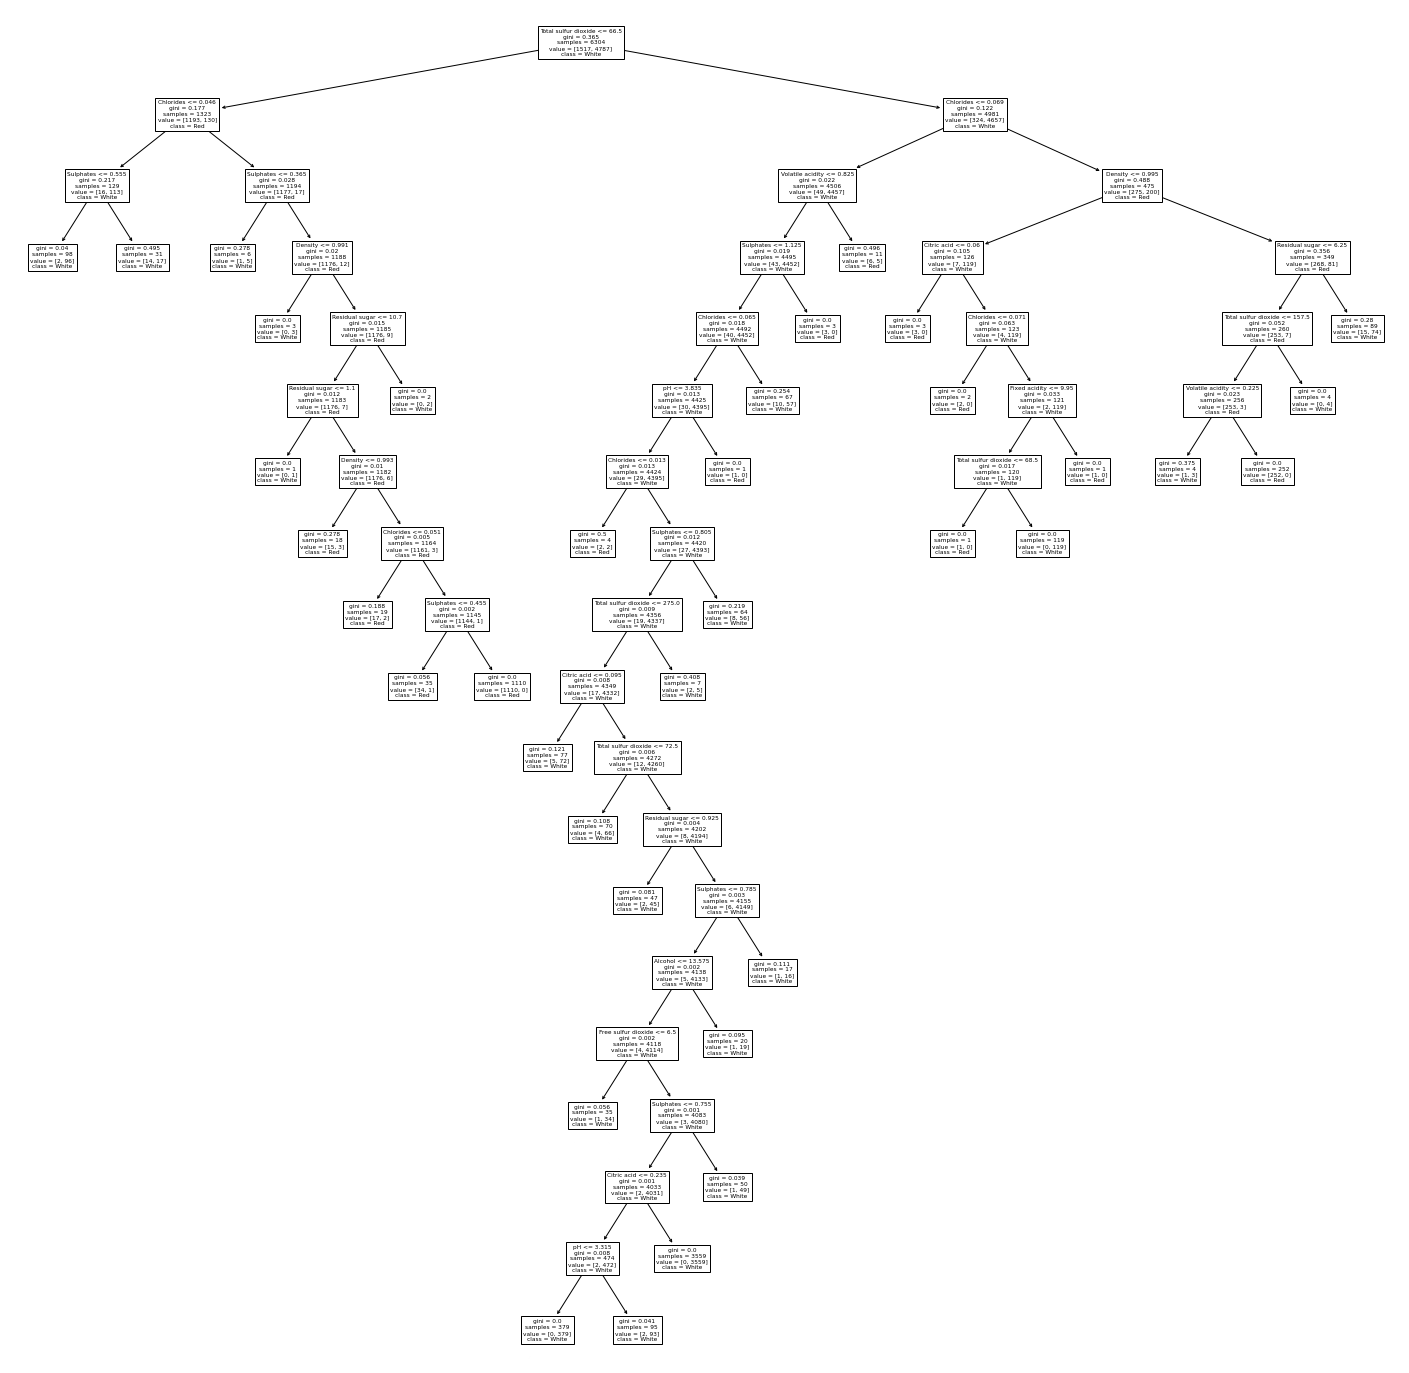

In [4]:
dtc = None

# YOUR CODE HERE
from sklearn import tree
import matplotlib.pyplot as plt
dtc = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=100)
dtc.fit(X, y)
plt.figure(figsize=(25,25))
tree.plot_tree(dtc, feature_names=attribute_names, class_names=class_names);
plt.show()

**Answer:** The decision tree either terminates earlier or later depending on this value. If min_samples_split is very low the decision tree may take a while before it terminates, on the contrary if it has a large value it may terminate early. Depending on this value you can therefore potentially overfit or underfit the decision tree. A value of 100 seems to be a pretty decent termination condition (you would then need at least need 100 samples, before you are allowed to split).

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? You can use the `decision_path` function to specifically print the path for a certain sample.

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

**helpful hint:**
> If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. 

In [5]:
# YOUR CODE HERE
pred_object = [6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.64, 12]
prediction = class_names[dtc.predict([pred_object])[0]]
path = dtc.decision_path([pred_object])
print(prediction)
print([attribute_names[i] for i in path.indices])

White
['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Chlorides']


**Answer:** The attributes used in the decision tree are: Fixed acidity, Volatile acidity, Citric acid and Chlorides. The decision tree then of course splits on the optimal found threshold value for each of the attributes. It turns out that for this example the decision tree splitted the attributes on the order that I mentioned. So fixed acidity seems to have the most information gain for a certain split threshold. 

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What is the classification accuracy of the tree on the wine data? Save the accuracy (which should be a number between 0 and 1) to a variable called `accuracy` and print it. 

Why is the accuracy we've calculated in this experiment not a good measure of the performance of our classifier?


In [6]:
accuracy = None
# YOUR CODE HERE
preds = dtc.predict(X)
accuracy = len(preds[preds == y])/len(preds)
print(accuracy)

0.9868337563451777


**Answer:** Because the accuracy we found is based on our training data. Therefore it is a measure of how much it used the training data. For a more accurate measure we should use independent unseen test data for measuring the accuracy. For an even closer approximation of the accuracy you can also weigh the accuracy found on the training data and the accuracy found on the test data and then combine them to give a potentially more accurate accuracy measure.

In [7]:
"""Checks whether 3.1.4 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `data/wine.mat`. 

Divide the data into a training and a test data set by applying holdout cross-validation(see hints!). Use a **stratified** split, and set the percentage of training data to 33%.


Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 up to and incuding 20), 
+ create the decision tree object
+ fit the decision tree
+ predict the labels of the train and test data separately (name them `y_test_pred` and `y_train_pred`)
+ then compute the classification error on the training and test set

Plot the training and test classification error, in the same figure, as a function of the tree depth. **Add a legend to the plot!** This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. Let the `min_samples_split` variable be its default value.

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?

What happens to the test and train error when you set the `min_samples_split` parameter to 100?

**Helpful hints:**  
> Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. Read the documentation, and make sure you have a stratified split!
> The error is calculated as $1-accuracy$. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 




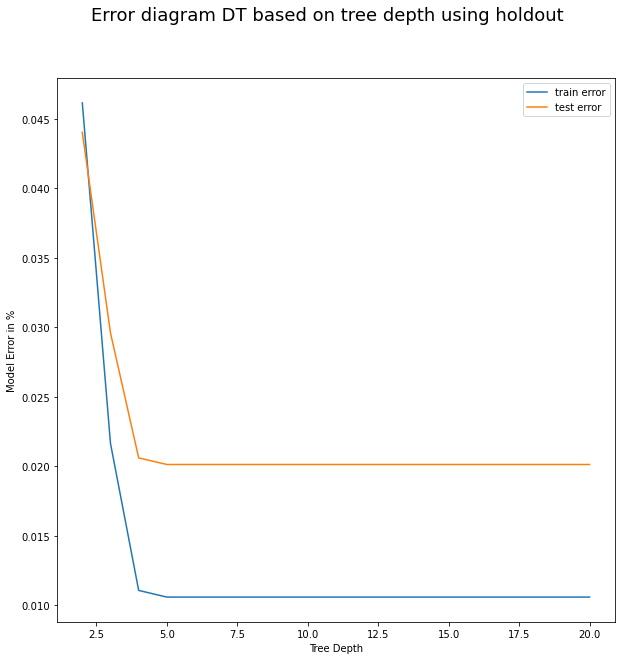

Minimum: 0.020123106060606077 
 Optimal depth: 3


In [8]:
random_state = 1337
X_train, X_test, y_train, y_test = None, None, None, None

# YOUR CODE HERE
# create data train_test_split and initialize variables
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, stratify=y, random_state=random_state)
trains = list()
tests = list()
depth_range = range(2,21)

# compute the errors of the predictions with the decision tree
for i in depth_range:
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=i, min_samples_split=100)
    dtc.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, dtc.predict(X_train))
    test_accuracy = accuracy_score(y_test, dtc.predict(X_test))
    trains.append(1 - train_accuracy)
    tests.append(1 - test_accuracy)

# plot the diagram with the errors
fig = plt.figure(figsize=(10,10))
fig.suptitle("Error diagram DT based on tree depth using holdout", fontsize=18)
plt.plot(depth_range, trains, label="train error")
plt.plot(depth_range, tests, label="test error")
plt.ylabel("Model Error in %")
plt.xlabel("Tree Depth")
plt.legend()
plt.show()

# get the optimal tree depth and the best minimum value
min_test_value = min(tests)
optim_tree_depth = tests.index(min_test_value)
print(f"Minimum: {min_test_value} \n Optimal depth: {optim_tree_depth}")
    

**Answer:** The optimal tree depth appears to be 3. When the min_samples_split is set to around 100 it appears to reach an optimal performance, when lower or higher values for min_samples_split are taken, the test dataset error appears to fluctuate a bit, depending on the tree depth.

#### 3.2.2
(1.5 pts) Repeat the exercise above, using **stratified** 10-fold cross-validation. K-fold cross-validation works by splitting `X` into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/

You will need a double for loop for this exercise. Think about what the best order of the loops is.

For each fold, fit a decision tree on the training set and evaluate its performance on the test set. 
Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?

> **hints:**
This time the `StratifiedKFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`
If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`

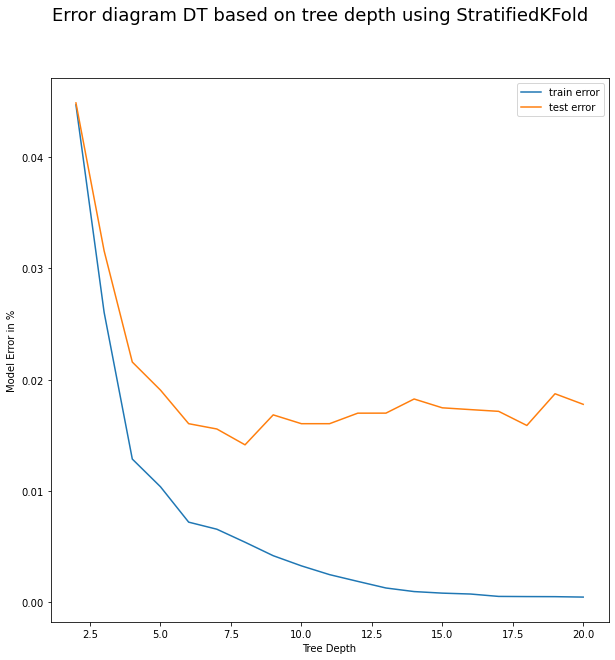

Minimum: 0.014124503968254931 
 Optimal depth: 6


In [16]:
# YOUR CODE HERE
# create StratifiedKFold of the data and initialize variables
from sklearn.model_selection import StratifiedKFold
folds = 100
skf = StratifiedKFold(n_splits=folds)

trains = list()
tests = list()

# compute the errors of the predictions with the decision tree
for i in depth_range:
    train_accur = 0
    test_accur = 0
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
        dtc.fit(X_train, y_train)
        train_accur += accuracy_score(y_train, dtc.predict(X_train))
        test_accur += accuracy_score(y_test, dtc.predict(X_test))
    train_accur /= folds
    test_accur /= folds
    trains.append(1 - train_accur)
    tests.append(1 - test_accur)
    
    
# plot the diagram with the errors
fig = plt.figure(figsize=(10,10))
fig.suptitle("Error diagram DT based on tree depth using StratifiedKFold", fontsize=18)
plt.plot(depth_range, trains, label="train error")
plt.plot(depth_range, tests, label="test error")
plt.ylabel("Model Error in %")
plt.xlabel("Tree Depth")
plt.legend()
plt.show()

# get the optimal tree depth and the best minimum value
min_test_value = min(tests)
optim_tree_depth = tests.index(min_test_value)
print(f"Minimum: {min_test_value} \n Optimal depth: {optim_tree_depth}")
    
        

**Answer:** For 10 folds the optimal tree depth fluctuates between 6 and 9. This is the case because the splits/folds are made randomly and therefore different results and optimal depths can be reached. For 100 folds the optimal tree depth appears to be more fixed around a depth of 6. I have no particular clue why there is this difference, but it might be because the more folds the more training data is used at each cross-validation, which allows for a more accurate representation of the model on the data, and this might then decrease the tree depth?

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`


What's the AUC you calculated? Save the calculated AUC to a variable called `auc_score_3_3_1` 

Do you think this classifier works well?

> **hints:**
You can use the `sklearn.metrics.roc_auc_score` function to calculate the AUC.


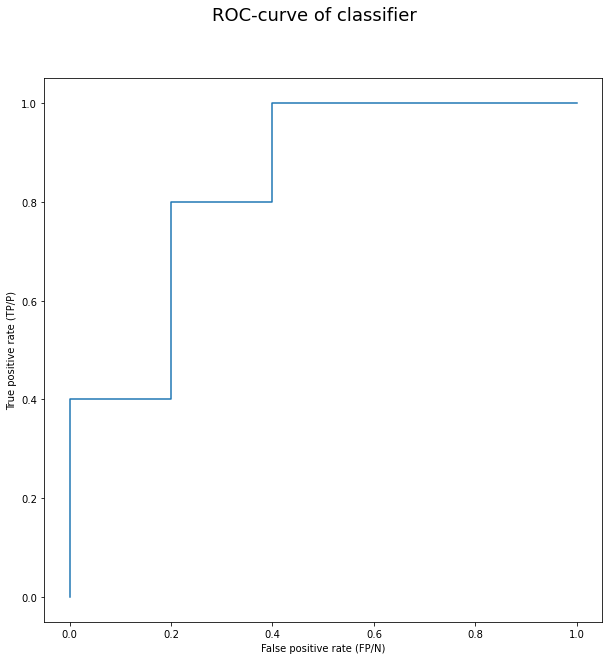

AUC score: 0.8400000000000001


In [37]:

auc_score_3_3_1 = None

# YOUR CODE HERE
import numpy as np
# the data on the classifier
labels = np.array([0,0,0,1,0,1,1,0,1,1])
classifier_probs = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

# amounts of each class and total length of observations
pos = len(labels[labels == 1])
neg = len(labels[labels == 0])
total = len(labels)

# lists with the false positive and true positive rate
TPR = list()
FPR = list()
#create thresholds
thresholds = list(np.linspace(0,1, total*2))
thresholds.reverse()

# loop that generates the TPR and FPR lists
for threshold in thresholds:
    TP = 0
    FP = 0
    for i in range(total):
        if classifier_probs[i] > threshold:
            if labels[i] == 1:
                TP += 1
            else:
                FP += 1
    TPR.append(TP/pos)
    FPR.append(FP/neg)

# make the ROC-plot
fig = plt.figure(figsize=(10,10))
fig.suptitle("ROC-curve of classifier", fontsize=18)
plt.plot(FPR, TPR)
plt.xlabel("False positive rate (FP/N)")
plt.ylabel("True positive rate (TP/P)")
plt.show()

#calculate AUC
from sklearn.metrics import roc_auc_score
auc_score_3_3_1 = roc_auc_score(labels, classifier_probs)
print(f"AUC score: {auc_score_3_3_1}")

In [ ]:
"""Checks whether 3.3.1 output is correct"""
"""DO NOT MODIFY THIS CELL"""

**Answer:** The AUC-score I got with the roc_auc_score function was 0.84, and I fact checked this by taking the integral of the plot as well and this corresponded with the AUC-score of the sklearn roc_auc_score function. So the AUC-score should be correct. My ROC-curve plot must then be correct as well. I think this classifier performs okay, but there is still a lot of room for improvement, since the AUC-score is still a bit away from 1 (the maximum possible AUC, which would be a 100% correct classifier).

#### 3.3.2
(0.25 pts) Load the file `data/classprobs.xls` using the Pandas `read_excel` function. **Think about what to do with the `header` argument!** Inspect the data and cast it to a Numpy array with the `.to_numpy` method. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0). Save the class labels to a variable called `true_class`, the predicted probabilities of the first classifier to `pred1` and those of the second classifier to `pred2`. All of these should be Numpy arrays.


In [44]:
true_class = None
pred1 = None
pred2 = None

# YOUR CODE HERE
import pandas as pd
# read and store the data
data = pd.read_excel("./data/classprobs.xls", header=None).to_numpy()
true_class = data[:, 0]
pred1 = data[:, 1]
pred2 = data[:, 2]



In [40]:
"""Checks whether 3.3.2 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

#### 3.3.3
(0.75 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

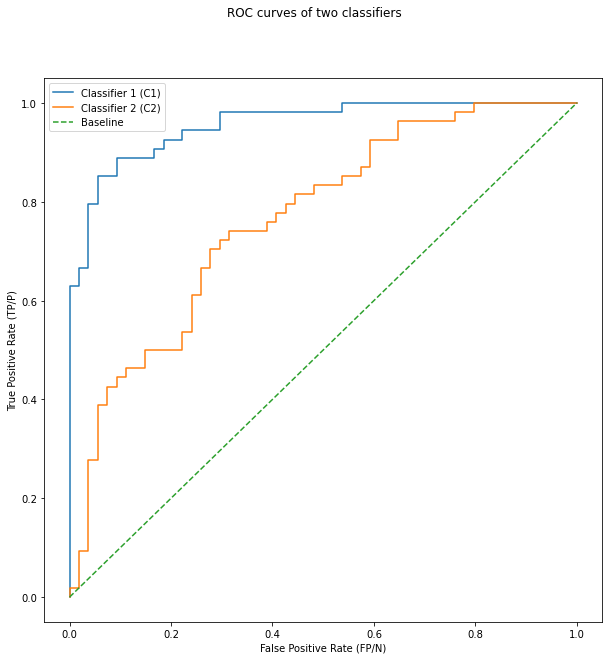

In [55]:
# YOUR CODE HERE
from sklearn.metrics import roc_curve
# calculate FP-rates and TP-rates for both classifiers
fpr1, tpr1, trhs1 = roc_curve(true_class, pred1)
fpr2, tpr2, trhs2 = roc_curve(true_class, pred2)
# plot the ROC_curves
fig = plt.figure(figsize=(10,10))
fig.suptitle("ROC curves of two classifiers")
plt.plot(fpr1,tpr1, label="Classifier 1 (C1)")
plt.plot(fpr2,tpr2, label="Classifier 2 (C2)")
plt.plot([0,1], [0,1], '--', label="Baseline")
plt.ylabel("True Positive Rate (TP/P)")
plt.xlabel("False Positive Rate (FP/N)")
plt.legend()
plt.show()


**Answer:** Both classifiers appear to perform better than just random guessing, since they are both above the baseline. Furthermore classifier 1 seems to outperform classifier 2 by quite a bit (the AUC of C1 appears to be larger than C2). This can also be seen by the fact that the ROC-curve of C1 is steeper than C2.

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline? Save the AUC scores for both classifiers to variables called `AUC1` and `AUC2` respectively.

In [54]:
AUC1 = None
AUC2 = None

# YOUR CODE HERE
zeros1 = pred1[true_class == 0]
ones1 = pred1[true_class == 1]
zeros2 = pred2[true_class == 0]
ones2 = pred2[true_class == 1]

# calculate AUC for Classifier 1
count = 0
for one in ones1:
    for zero in zeros1:
        if one > zero:
            count += 1
count /= ones1.shape[0]*zeros1.shape[0]
AUC1 = count
# calculate AUC for Classifier 2
count = 0
for one in ones2:
    for zero in zeros2:
        if one > zero:
            count += 1
count /= ones2.shape[0]*zeros2.shape[0]
AUC2 = count
print(f"AUC1: {AUC1}; AUC2: {AUC2}")

AUC1: 0.9564471879286695; AUC2: 0.7654320987654321


In [ ]:
"""Checks whether 3.3.4 output is correct"""
"""DO NOT MODIFY THIS CELL"""

**Answers:** The AUC-scores do indeed indicate that both classifiers perform better than the baseline, since the baseline has an AUC of 0.5*1 = 0.5, and AUC1 $\approx$ 0.96, AUC2 $\approx$ 0.77. It also shows that the first classifier performs better than the second classifier.


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers. Save them to `acc_1` and `acc_2` respectively

> **hint:**
Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [66]:
acc_1 = None
acc_2 = None

# YOUR CODE HERE
# compute the classifications for both classifiers with the threshold set to 0.5
threshold = 0.5
bool1 = pred1>threshold
class1 = np.array([1 if b else 0 for b in bool1])
bool2 = pred2>threshold
class2 = np.array([1 if b else 0 for b in bool2])
# compute the accuracy
acc_1 = accuracy_score(true_class, class1)
acc_2 = accuracy_score(true_class, class2)
print(f"acc_1: {acc_1}; acc_2: {acc_2}")

acc_1: 0.8611111111111112; acc_2: 0.6944444444444444


In [ ]:
"""Checks whether 3.3.5 output is correct"""
"""DO NOT MODIFY THIS CELL"""

#### 3.3.6
(1 pts) Create a 2x2 table (as Numpy array) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.** 

Make sure the elements in the table are at the correct position and that the table is saved as numpy array under the name `table`.
Save the calculated p-value to a variable called `pval`.

> **hints:**  
As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).


In [79]:
pval = None

# YOUR CODE HERE
# Create 2x2 table with the values
right1 = class1==true_class
wrong1 = class1!=true_class
right2 = class2==true_class
wrong2 = class2!=true_class
c1c2 = true_class[(right1 & right2)].shape[0]
w1w2 = true_class[(wrong1 & wrong2)].shape[0]
c1w2 = true_class[(right1 & wrong2)].shape[0]
w1c2 = true_class[(wrong1 & right2)].shape[0]

table = np.array([[c1c2, c1w2],[w1c2, w1w2]])
print(table)
# Calculate the pval
from scipy.stats import binom
N_l = table[0,1]
N_r = table[1,0]
N = N_l + N_r
b = binom(N, 67/108)
pval = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print(pval)

[[67 26]
 [ 8  7]]
0.05639472023299351


In [ ]:
"""Checks whether 3.3.6 output is correct"""
"""DO NOT MODIFY THIS CELL"""

Because the p-value is below the significance level (0.05) we can say that the two classifiers perform significantly different. One classifier clearly outperforms the other. In our case this is C1

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [49]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<2}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0   | 1 | 0
 bet 1   | 1 | 1
 bet 2   | 1 | 0
 bet 3   | 0 | 1
 bet 4   | 1 | 0
 bet 5   | 1 | 1
 bet 6   | 1 | 0
 bet 7   | 1 | 0
 bet 8   | 1 | 0
 bet 9   | 0 | 1
 bet 10  | 1 | 0
 bet 11  | 1 | 1
 bet 12  | 1 | 0
 bet 13  | 1 | 1
 bet 14  | 0 | 1
 bet 15  | 1 | 1
 bet 16  | 1 | 1
 bet 17  | 0 | 0
 bet 18  | 1 | 0
 bet 19  | 1 | 0
 bet 20  | 1 | 0
 bet 21  | 0 | 0
 bet 22  | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [50]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

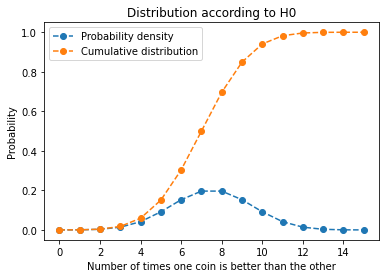

In [51]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [ ]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.